In [20]:
# Import Libraries

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
P = 31115 * (1.075)
r = 0.0702 / 12
n = 60
numerator = (r *((1 + r)**(n)) )
denominator = ((1 + r)**(n)) - 1
emi = P * (numerator / denominator)
np.round(emi,2)

662.64

In [22]:
P = 31115 + (32615 * 0.0975) + 50 + 200 + 65 + 80
r = 0.0702 / 12
n = 60
numerator = (r *((1 + r)**(n)) )
denominator = ((1 + r)**(n)) - 1
emi = P * (numerator / denominator)
np.round(emi,2)

687.23

In [23]:
'The Monthly Payment with fees included is {} higher'.format(np.round(687.23 - 662.64,2))


'The Monthly Payment with fees included is 24.59 higher'

In [24]:
# Calculate one month of interest
P = 34689.9625
r = 0.0702 / 12

r * P

202.93628062500002

In [25]:
# Calculate new principal (after one payment)

34689.9625 - (687.23 - 202.94)

34205.6725

In [26]:
import numpy as np
import pandas as pd

term = 60
P = 34689.96

def calc_interest(P,emi,interest_rate = 0.0702):
    interest_paid = np.floor(((interest_rate/12)*P)*100)/100
    principal_paid = np.round(emi-interest_paid, 2)
    new_balance = np.round(P - principal_paid,2)
    return(emi, interest_paid, principal_paid, new_balance)

payment_list = []
for n in range(1, term + 1):
    emi,i_paid,p_paid,new_p = calc_interest(P, emi)
    payment_list.append([n, P, emi, i_paid, p_paid, new_p])
    P = np.round(new_p,2)

In [27]:
c_names = ['Month','Starting Balance','Repayment','Interest Paid','Principal Paid','New Balance']
payment_table = pd.DataFrame(payment_list, columns = c_names)

In [28]:
payment_table.head(10)


,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance
0,1,34689.96,687.230218,202.93,484.30,34205.66
1,2,34205.66,687.230218,200.10,487.13,33718.53
2,3,33718.53,687.230218,197.25,489.98,33228.55
3,4,33228.55,687.230218,194.38,492.85,32735.70
4,5,32735.70,687.230218,191.50,495.73,32239.97
5,6,32239.97,687.230218,188.60,498.63,31741.34
6,7,31741.34,687.230218,185.68,501.55,31239.79
7,8,31239.79,687.230218,182.75,504.48,30735.31
8,9,30735.31,687.230218,179.80,507.43,30227.88
9,10,30227.88,687.230218,176.83,510.40,29717.48


In [29]:
np.round(payment_table['Interest Paid'].sum(), 2)


6543.51

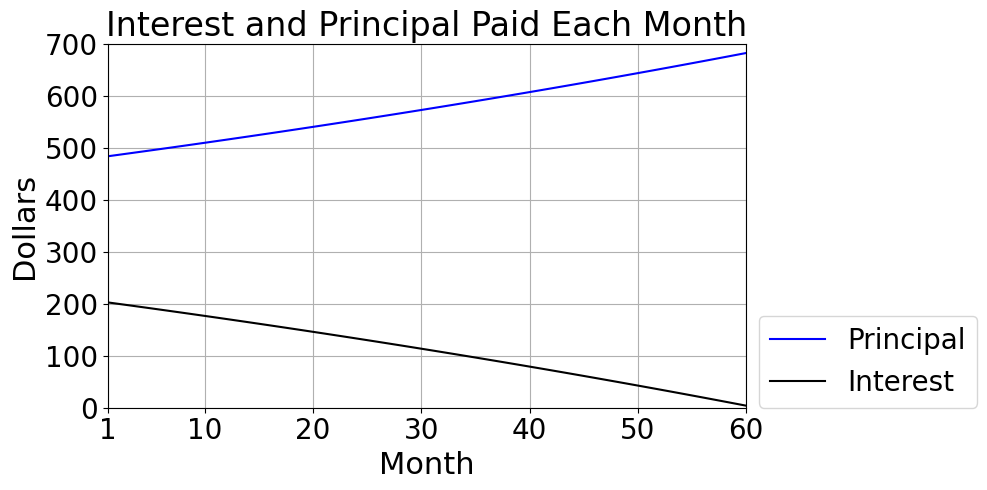

In [30]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5) )
axes.plot(payment_table['Month'], payment_table['Principal Paid'], c = 'b', label = 'Principal');
axes.plot(payment_table['Month'], payment_table['Interest Paid'], c = 'k', label = 'Interest');

axes.set_xlim((1, 60));
axes.set_xticks([1, 10, 20, 30, 40, 50, 60])
axes.set_ylim((0, 700));
axes.set_ylabel('Dollars', fontsize = 22);
axes.set_xlabel('Month', fontsize = 22);

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
axes.set_title('Interest and Principal Paid Each Month', fontsize = 24)

plt.legend(bbox_to_anchor=(1.02,0), loc="lower left", borderaxespad=0, fontsize = 20)
plt.tight_layout()
plt.grid(axis = 'both')
plt.savefig('Interest_Principal.png', dpi = 1000)

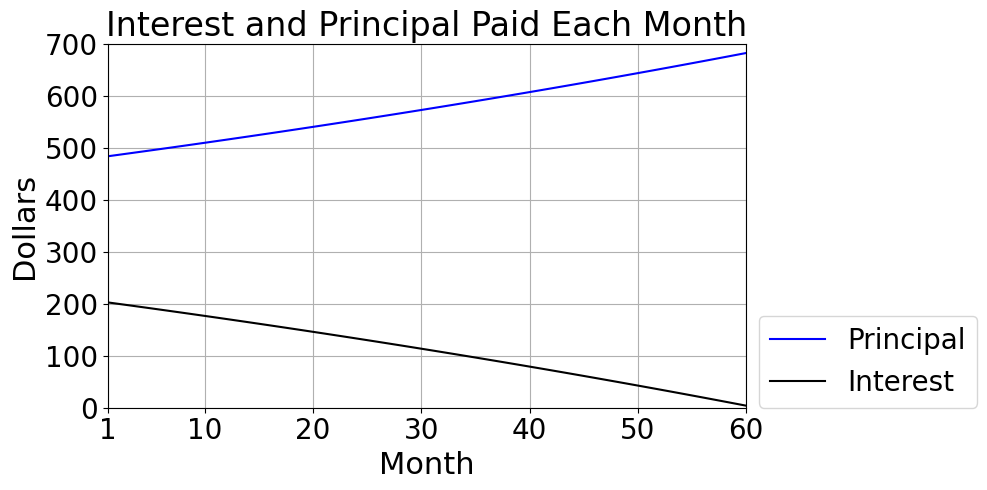

In [31]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5) )
axes.plot(payment_table['Month'], payment_table['Principal Paid'], c = 'b', label = 'Principal');
axes.plot(payment_table['Month'], payment_table['Interest Paid'], c = 'k', label = 'Interest');

axes.set_xlim((1, 60));
axes.set_xticks([1, 10, 20, 30, 40, 50, 60])
axes.set_ylim((0, 700));
axes.set_ylabel('Dollars', fontsize = 22);
axes.set_xlabel('Month', fontsize = 22);

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
axes.set_title('Interest and Principal Paid Each Month', fontsize = 24)

plt.legend(bbox_to_anchor=(1.02,0), loc="lower left", borderaxespad=0, fontsize = 20)
plt.tight_layout()
plt.grid(axis = 'both')
plt.savefig('Interest_Principal.png', dpi = 1000)

In [32]:
P = 34689.96
term = 60

def generate_loan_table(P, term, interest_rate=0.0702):

    def calc_emi(P, n, interest_rate):
        r = interest_rate / 12
        numerator = (r *((1 + r)**(n)) )
        denominator = ((1 + r)**(n)) - 1
        emi = P * (numerator / denominator)
        emi = np.round(emi, 2)
        return(emi)
    
    def calc_interest(P, emi, interest_rate):
        i_paid = np.floor(((interest_rate/12)*P)*100)/100
        p_paid = np.round(emi - i_paid, 2)
        new_p = np.round(P - p_paid,2)
        return(emi, i_paid, p_paid, new_p)

    emi = calc_emi(P, term, interest_rate)
    payment_list = []
    
    for n in range(1, term + 1):
        emi,i_paid,p_paid, new_p = calc_interest(P, emi, interest_rate)
        payment_list.append([n, P,emi, i_paid, p_paid, new_p])
        P = np.round(new_p,2)
   
    payment_table = pd.DataFrame(payment_list, columns = ['Month',
                                                       'Starting Balance',
                                                       'Repayment',
                                                       'Interest Paid',
                                                       'Principal Paid',
                                                       'New Balance'])
    return(payment_table, np.round(payment_table['Interest Paid'].sum(), 2), emi)


In [33]:
o_table, o_paid, o_emi = generate_loan_table(P,term,interest_rate=0.0702)
r_table, r_paid, r_emi = generate_loan_table(P,term,interest_rate=0.0359)

In [34]:
"Refinancing could save: {}".format(6543.51 - 3257.88)


'Refinancing could save: 3285.63'

In [35]:
original_table, original_paid, original_emi = generate_loan_table(P, term = 60, interest_rate = 0.0702)
seventyTwo_table, seventyTwo_paid, seventyTwo_emi = generate_loan_table(P, term = 72, interest_rate = 0.0702)

In [36]:
original_emi, seventyTwo_emi


(687.23, 591.76)

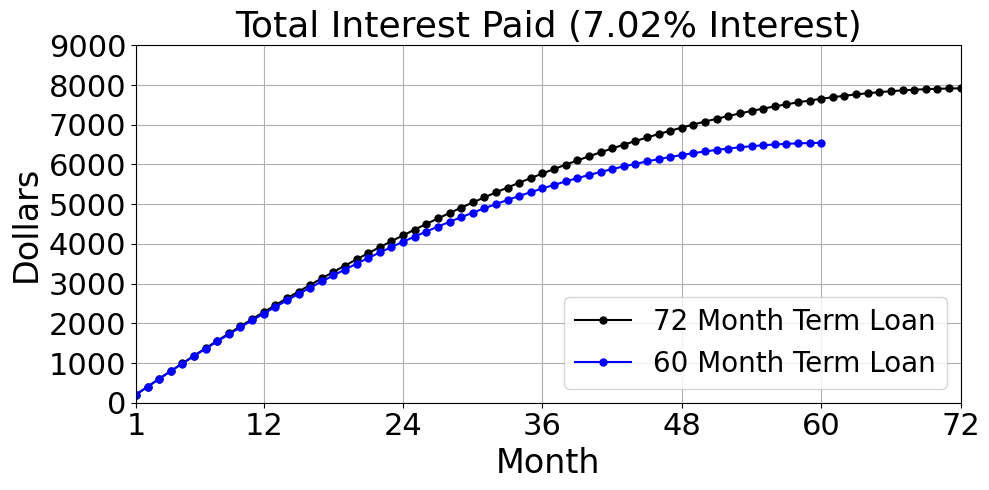

In [37]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5) )
axes.plot(seventyTwo_table['Month'], seventyTwo_table['Interest Paid'].cumsum(), c = 'k', marker = '.', markersize = 10, label = '72 Month Term Loan');
axes.plot(original_table['Month'], original_table['Interest Paid'].cumsum(), c = 'b', marker = '.', markersize = 10, label = '60 Month Term Loan');

axes.set_xlim((1, 72));
axes.set_xticks([1, 12, 24, 36, 48, 60, 72])
axes.set_ylim((0, 9000));
axes.set_ylabel('Dollars', fontsize = 24);
axes.set_xlabel('Month', fontsize = 24);

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
axes.set_title('Total Interest Paid (7.02% Interest)', fontsize = 26)

plt.legend(loc="lower right", fontsize = 20)
plt.tight_layout()
plt.grid(axis = 'both')
plt.savefig('Total_Interest_Paid.png', dpi = 1000)